# Descriptive analysis

In [21]:
import csv
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
from wordcloud import WordCloud
from collections import Counter, defaultdict

In [22]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
!ls /content/drive/MyDrive/NLP_Ensae/

CamemBERT.ipynb  entities.json	Untitled0.ipynb


In [24]:
with open("/content/drive/MyDrive/NLP_Ensae/entities.json", 'r') as f:
    data = json.load(f)
df = pd.DataFrame([data])

## Data Processing

In [25]:
entity_map = {
    'Ⓟ': 'surname_household',
    'Ⓕ': 'firstname',
    'Ⓜ': 'occupation',
    'Ⓗ': 'link',
    'Ⓑ': 'birth_date',
    'Ⓚ': 'nationality',
    'Ⓘ': 'lob',
    'Ⓐ': 'age',
    'Ⓒ': 'civil_status',
    'Ⓔ': 'employer',
    'Ⓛ': 'observation',
    'Ⓞ': 'surname'}

In [26]:
# This function process individual information into a format: {"tokens": tokens, "ner_tags": ner_tags}
def transform_data(data):
    tokens = []
    ner_tags = []
    current_entity = None
    current_token = ''

    for char in data:
        if char in entity_map:
            if current_entity:
                tokens.append(current_token.strip())  # Add the current token
                ner_tags.append(entity_map[current_entity])
                current_token = ''  # Reset the token
            current_entity = char  # Update the current entity
        else:
            if current_entity:
                current_token += char  # Add character to the current token

    # Add the last token
    if current_entity:
        tokens.append(current_token.strip())  # Add the last token
        ner_tags.append(entity_map[current_entity])

    return {"tokens": tokens, "ner_tags": ner_tags}


In [27]:
# Here we process each ligne (which represent an individu) of our JSON file
data_set_prepo = []

for document in data.values():
    individus = document.split('\n')

    for individu in individus:
        if "idem" in individu:
            line_in = transform_data(individu)
            keys_with_idem_values = [tag for tag, token in zip(line_in["ner_tags"], line_in["tokens"]) if token == "idem"]
            for tag in keys_with_idem_values:
                index_tag_current = line_in["ner_tags"].index(tag)
                stop = False
                i = 1
                while not stop and i <= len(data_set_prepo):
                    stop = (tag in data_set_prepo[-i]["ner_tags"])
                    i += 1

                if stop:
                    index_tag_previous = data_set_prepo[-(i-1)]["ner_tags"].index(tag)
                    line_in["tokens"][index_tag_current] = data_set_prepo[-(i-1)]['tokens'][index_tag_previous]

        else:
            line_in = transform_data(individu)

        data_set_prepo.append(line_in)

In [28]:
for i in range(43, 45):
    print(data_set_prepo[i])

{'tokens': ['Chometon', 'Jean Baptiste', 'scieur de pierre', 'chef', 'Cartier', '1883', 'française', 'Teillet - Allier'], 'ner_tags': ['surname_household', 'firstname', 'occupation', 'link', 'employer', 'birth_date', 'nationality', 'lob']}
{'tokens': ['Chometon', 'Germaine Eurélie', 'fleuriste', 'femme', 'Dupuis', '1888', 'française', 'Orléans'], 'ner_tags': ['surname', 'firstname', 'occupation', 'link', 'employer', 'birth_date', 'nationality', 'lob']}


In [29]:
print("Sample number: ",len(data_set_prepo))

Sample number:  25448


In [30]:
Nationality = []
study_level = []
occupation = []
age = []
civil_status = []
lob = []
employer = []
firstname = []
surname = []
birth_date = []
link = []

for i in range(len(data_set_prepo)):
  if 'nationality' in data_set_prepo[i]['ner_tags']:
    index = data_set_prepo[i]['ner_tags'].index('nationality')
    Nationality.append(data_set_prepo[i]['tokens'][index])

  if 'occupation' in data_set_prepo[i]['ner_tags']:
      index = data_set_prepo[i]['ner_tags'].index('occupation')
      occupation.append(data_set_prepo[i]['tokens'][index])

  if 'civil_status' in data_set_prepo[i]['ner_tags']:
      index = data_set_prepo[i]['ner_tags'].index('civil_status')
      civil_status.append(data_set_prepo[i]['tokens'][index])

  if 'education_level' in data_set_prepo[i]['ner_tags']:
      index = data_set_prepo[i]['ner_tags'].index('education_level')
      study_level.append(data_set_prepo[i]['tokens'][index])

  if 'age' in data_set_prepo[i]['ner_tags']:
      index = data_set_prepo[i]['ner_tags'].index('age')
      age.append(data_set_prepo[i]['tokens'][index])

  if 'lob' in data_set_prepo[i]['ner_tags']:
      index = data_set_prepo[i]['ner_tags'].index('lob')
      lob.append(data_set_prepo[i]['tokens'][index])

  if 'employer' in data_set_prepo[i]['ner_tags']:
       index = data_set_prepo[i]['ner_tags'].index('employer')
       employer.append(data_set_prepo[i]['tokens'][index])

  if 'firstname' in data_set_prepo[i]['ner_tags']:
       index = data_set_prepo[i]['ner_tags'].index('firstname')
       firstname.append(data_set_prepo[i]['tokens'][index])

  if 'surname' in data_set_prepo[i]['ner_tags']:
       index = data_set_prepo[i]['ner_tags'].index('surname')
       surname.append(data_set_prepo[i]['tokens'][index])

  if 'birth_date' in data_set_prepo[i]['ner_tags']:
       index = data_set_prepo[i]['ner_tags'].index('birth_date')
       birth_date.append(data_set_prepo[i]['tokens'][index])

  if 'link' in data_set_prepo[i]['ner_tags']:
       index = data_set_prepo[i]['ner_tags'].index('link')
       link.append(data_set_prepo[i]['tokens'][index])

### a) Nationality

In [31]:
def plot_histogram(nationality_data, h, l, relative=False):
    # Count the frequency of each nationality
    nationality_counts = Counter(nationality_data)

    # Sort the nationalities by frequency
    sorted_counts = sorted(nationality_counts.items(), key=lambda x: x[1], reverse=True)
    labels, values = zip(*sorted_counts)

    # Calculate relative frequencies if requested
    if relative:
        total_individuals = sum(values)
        relative_frequencies = [count / total_individuals for count in values]
    else:
        relative_frequencies = [None] * len(values)

    # Create the figure and axes objects with adjusted size
    fig, ax = plt.subplots(figsize=(h, l))

    # Create the histogram with adjusted bar width
    bars = ax.bar(labels, values, width=0.6)  # Adjust the width as needed

    # Add frequency labels above each bar
    for bar, value, rel_freq in zip(bars, values, relative_frequencies):
        if relative:
            ax.text(bar.get_x() + bar.get_width() / 2, value + 0.05, f"{value} ({rel_freq:.2f})", ha='center', va='bottom', fontsize=14)
        else:
            ax.text(bar.get_x() + bar.get_width() / 2, value + 0.05, str(value), ha='center', va='bottom', fontsize=14)

    # Add titles and labels with increased font size
    ax.set_title('Most represented Nationalities', fontsize=18)
    ax.set_xlabel('Nationality', fontsize=16)
    ax.set_ylabel('Number of Individuals', fontsize=16)

    # Rotate the labels for better readability
    plt.xticks(rotation=90, fontsize = 14)
    plt.yticks(fontsize = 14)

    # Show the plot
    plt.tight_layout()
    plt.show()

In [32]:
print("Number of individuals with avaible nationnaty: ", len(Nationality))

Number of individuals with avaible nationnaty:  13314


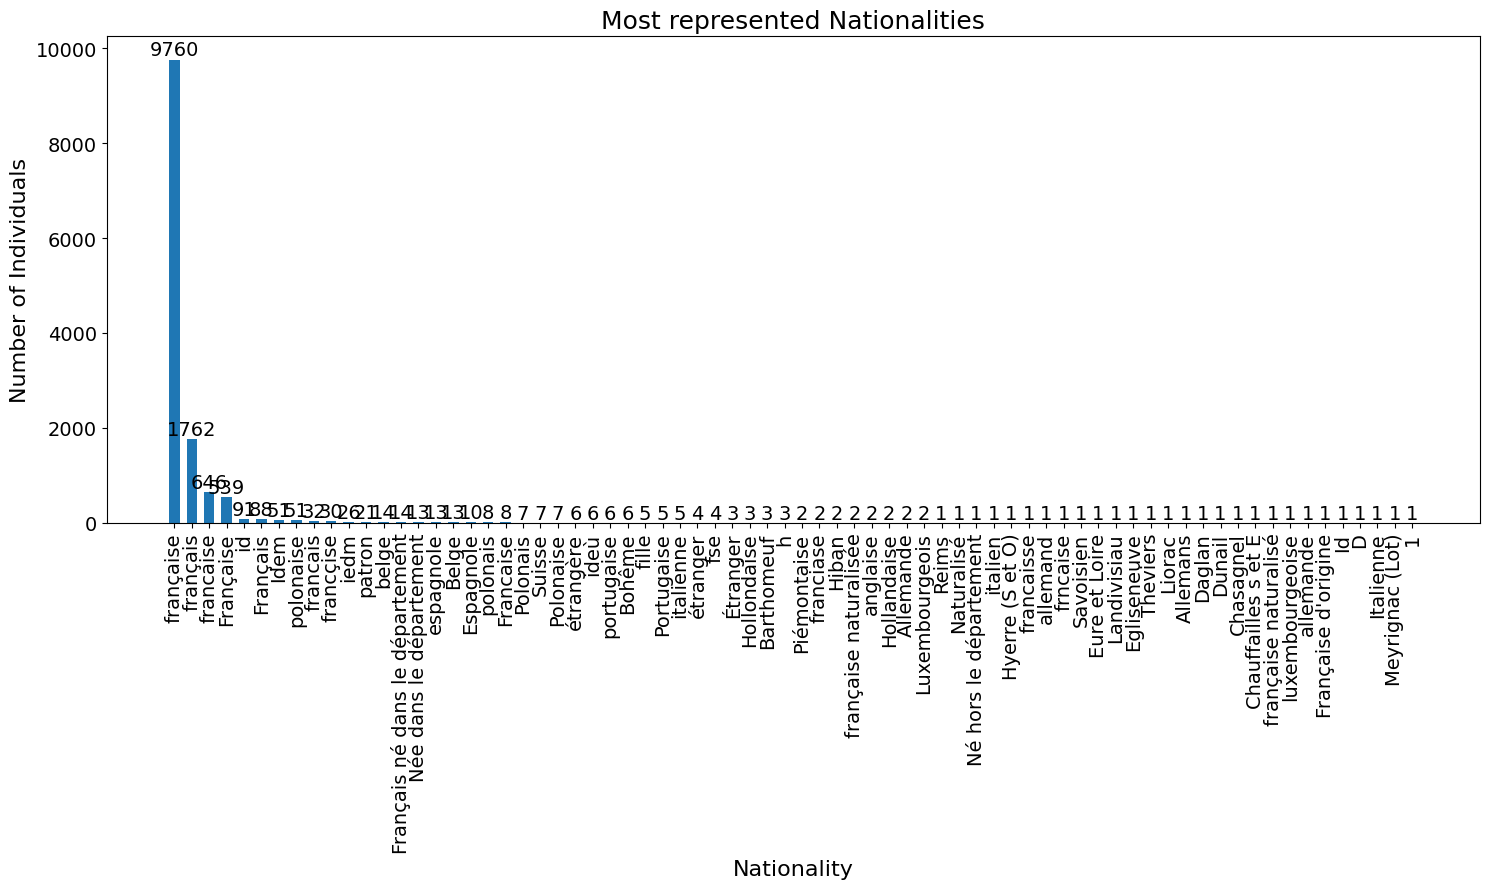

In [33]:
plot_histogram(Nationality, h=15, l= 9)

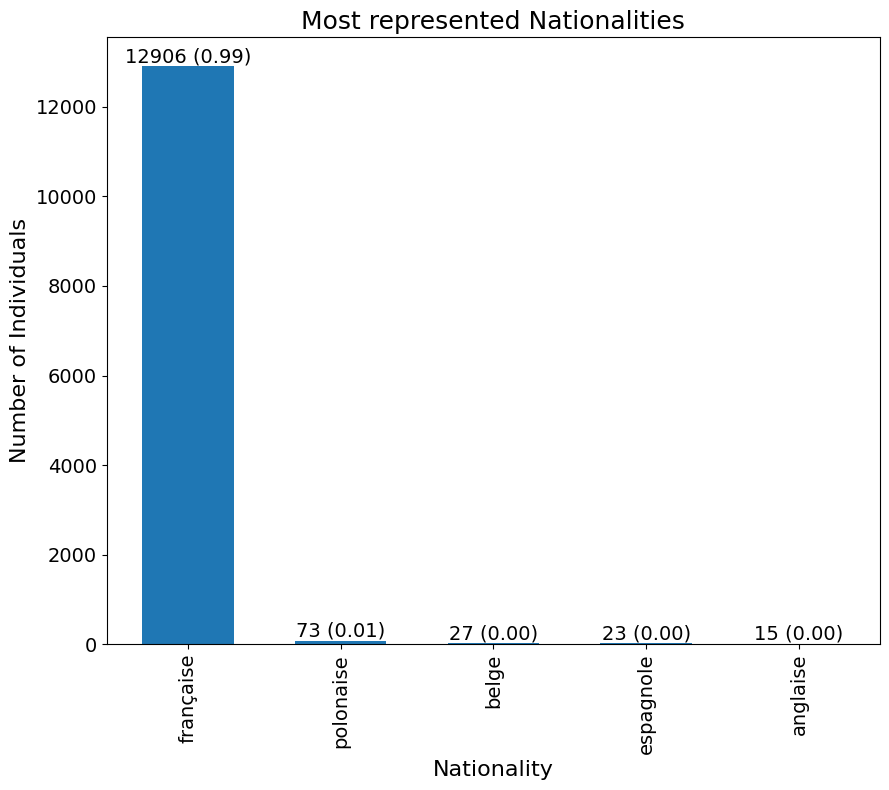

In [34]:
Nationality = [nationality.lower() for nationality in Nationality]

Nationality_corrected = []
for i in range(len(Nationality)):
  if ("fr" in Nationality[i])  or ("né" in Nationality[i]) or ("nat" in Nationality[i]) or ("fse" in Nationality[i]) :
    Nationality_corrected.append("française")
  elif ("all" in Nationality[i])  :
    Nationality_corrected.append("allemand")
  elif  ("pol" in Nationality[i]) :
    Nationality_corrected.append("polonaise")
  elif  ("por" in Nationality[i]) :
    Nationality_corrected.append("portugaise")
  elif  ("hol" in Nationality[i]) :
    Nationality_corrected.append("hollandaise")
  elif  ("ang" in Nationality[i]) :
    Nationality_corrected.append('anglaise')

  elif  ("it" in Nationality[i]) :
    Nationality_corrected.append('italienne')
  else:
    Nationality_corrected.append(Nationality[i])

Delete = ['liorac', 'meyrignac (lot)', 'd', 'fille', 'barthomeuf', 'luxembourgeois','hiban', 'italienne', 'suisse', 'allemand', "hollandaise", "portugaise",
          'eure et loire', 'dunail', 'chauffailles s et e','bohême', 'luxembourgeoise', 'hyerre (s et o)', 'patron',
          'reims', 'ideù', 'chasagnel', 'theviers', 'landivisiau', 'egliseneuve', 'piémontaise', 'daglan', 'id', 'iedm', 'idem', 'savoisien', 'h', '1']
Corrected_Nationality = []

for i in range(len(Nationality_corrected)):
  if  Nationality_corrected[i] == "fse":
    Corrected_Nationality.append('française')
  elif  (Nationality_corrected[i] not in Delete):
    Corrected_Nationality.append(Nationality_corrected[i])

plot_histogram(Corrected_Nationality, h = 9, l=8, relative=True)

### b) Occupation

In [35]:
print("Number of individuals with avaible occupation: ", len(occupation))

Number of individuals with avaible occupation:  16179


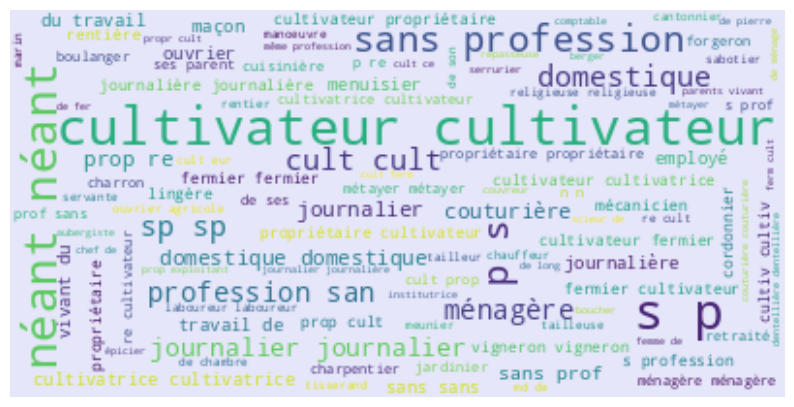

In [36]:
text = ""
for i in range(len(occupation)):
  text += " " + occupation[i]
wordcloud = WordCloud(background_color="lavender").generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [37]:
for i in range(len(occupation)):
  if "cult" in occupation[i]:
    occupation[i] = "cultivateur et cultivatrice"
  elif ('s.p' in occupation[i]) or ('sp' in occupation[i]) or ('sans profession' in occupation[i]) or ('sans' in occupation[i]) or ('s p' in occupation[i]):
    occupation[i] = "sans profession"
  elif 'journa' in occupation[i] :
    occupation[i] = "journalier et journalière"
  elif ("ménagère" in occupation[i]) or ("domestique" in occupation[i]):
    occupation[i] = "ménagère et domestique"

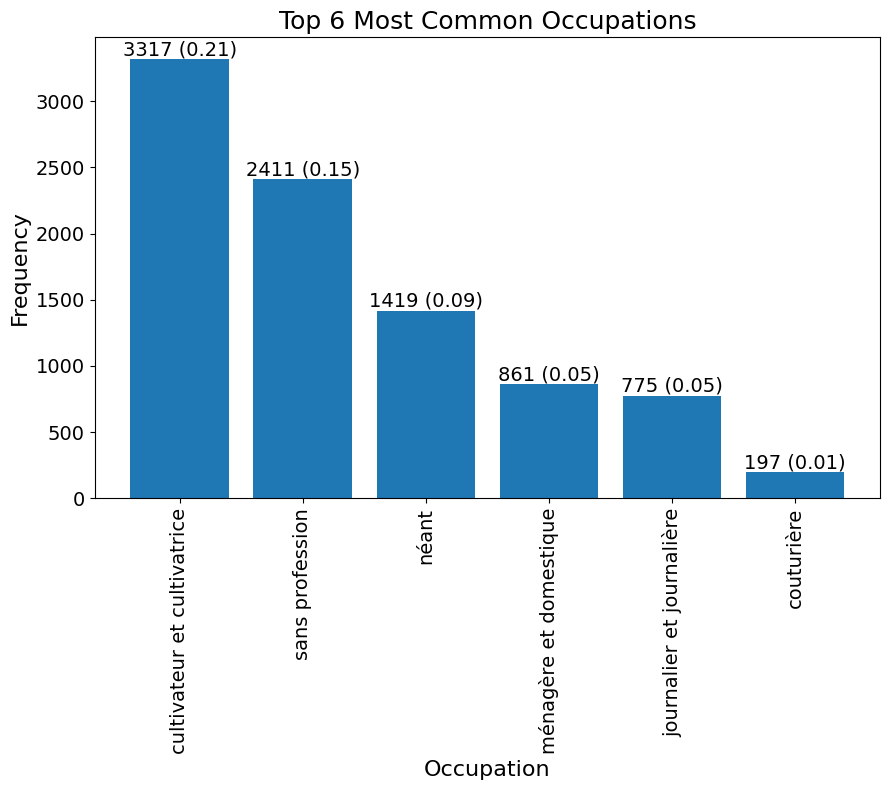

In [38]:
filtered_occupations = occupation
occupation_counts = Counter(filtered_occupations)
total_occupations = len(filtered_occupations)
relative_frequencies = {occ: count / total_occupations for occ, count in occupation_counts.items()}
top_occupations = occupation_counts.most_common(6)
labels, values = zip(*top_occupations)
plt.figure(figsize=(9,8))
bars = plt.bar(labels, values)
for bar, value, rel_freq in zip(bars, values, [relative_frequencies[occ] for occ, _ in top_occupations]):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.05, f"{value} ({rel_freq:.2f})", ha='center', va='bottom', fontsize = 14)
plt.title('Top 6 Most Common Occupations', fontsize = 18)
plt.xlabel('Occupation', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.xticks(rotation=90, fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()
plt.show()

### c) employer

In [39]:
print("Number individuals with avaible employer: ", len(employer))

Number individuals with avaible employer:  2911


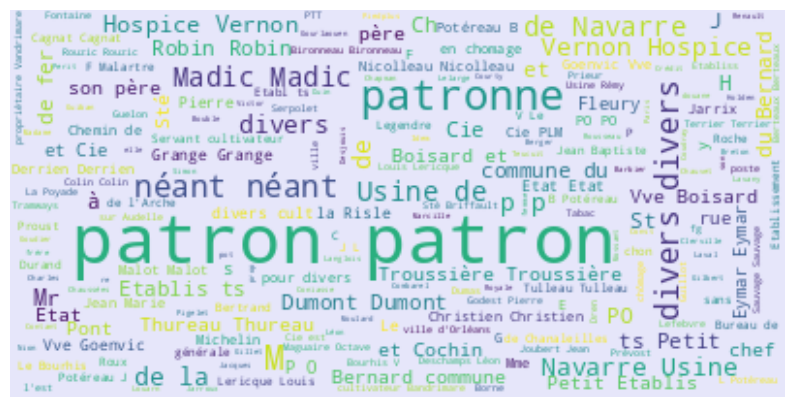

In [40]:
text = ""
for i in range(len(employer)):
  text += " " + employer[i]
wordcloud = WordCloud(background_color="lavender").generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

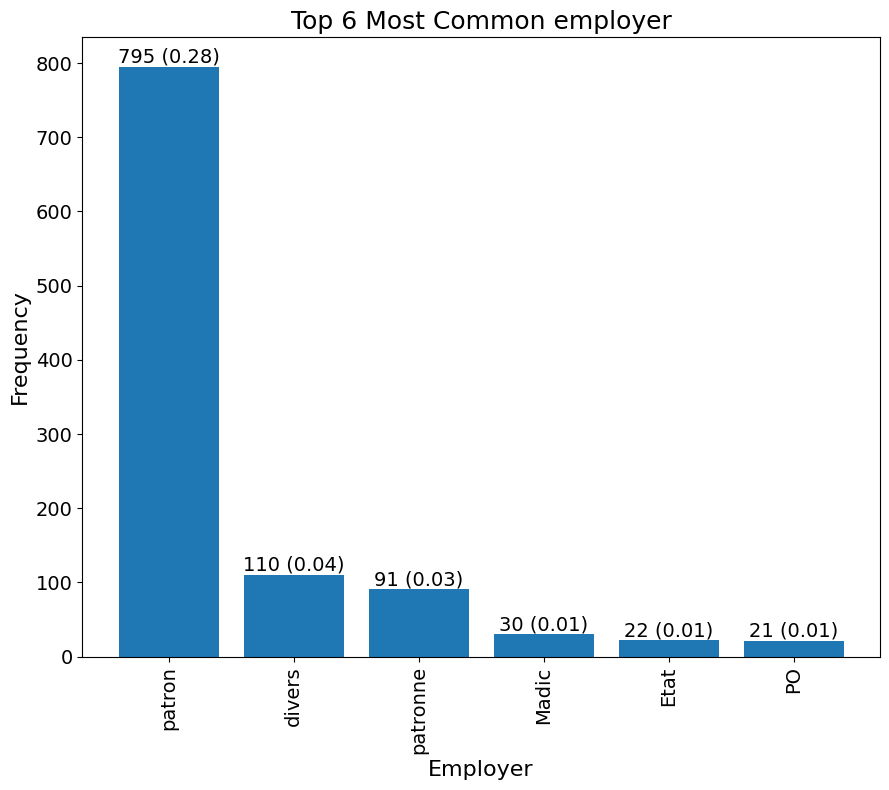

In [41]:
filtered_occupations = [occ for occ in employer if occ != "néant"]
occupation_counts = Counter(filtered_occupations)
total_occupations = len(filtered_occupations)
relative_frequencies = {occ: count / total_occupations for occ, count in occupation_counts.items()}
top_occupations = occupation_counts.most_common(6)
labels, values = zip(*top_occupations)
plt.figure(figsize=(9, 8))
bars = plt.bar(labels, values)
for bar, value, rel_freq in zip(bars, values, [relative_frequencies[occ] for occ, _ in top_occupations]):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.05, f"{value} ({rel_freq:.2f})", ha='center', va='bottom', fontsize = 14)
plt.title('Top 6 Most Common employer', fontsize = 18)
plt.xlabel('Employer', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.xticks(rotation=90, fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()
plt.show()

### d) Age

In [42]:
def convert_to_years(age):

    if age == "un mois":
        return round(1/12, 2)
    elif age == "3 mois et demi":
        return round(3.5/12, 2)
    elif age == "un mois 1/2":
        return round(1.5/12, 2)
    elif age == "mois":
        return -1
    elif age == "1'":
        return 1
    elif 'mois' in age:
        return round(int(age.split()[0]) / 12, 2)
    elif 'semaines' in age:
        return round(int(age.split()[0]) / 52.143, 2)
    elif 'jour' in age:
        return round(int(age.split()[0]) / 365.25, 2)
    elif age == "60ans":
        return 60
    elif age == "1an+1/2":
       return 1.5
    elif 'ans' in age:
        return round(int(age.split()[0]))
    elif age == 'fille':
      return -1
    elif age == "un an et demi" :
      return 1.5
    elif (len(age.split()) == 1) and (float(age) < 200):
      return float(age)
    elif len(age.split()) > 1:
      return float(age.split()[0]) + 0.5

ages_in_years = [convert_to_years(ag) for ag in age]

ages_in_years.remove(-1)
ages_in_years = np.array(ages_in_years)

In [43]:
ages_in_years = [age for age in ages_in_years if age is not None]

# Calculating mean, median, standard deviation, and interquartile range
mean_age = np.mean(ages_in_years)
median_age = np.median(ages_in_years)
std_age = np.std(ages_in_years)
q1 = np.percentile(ages_in_years, 25)
q3 = np.percentile(ages_in_years, 75)
iqr = q3 - q1

In [44]:
# Outputting statistics
print(f"first quartile: ", q1)
print(f'third quartile: ', q3)
print(f"Standard Deviation: {std_age:.2f}")
print(f"Interquartile Range (IQR): {iqr}")

first quartile:  13.0
third quartile:  46.0
Standard Deviation: 21.11
Interquartile Range (IQR): 33.0


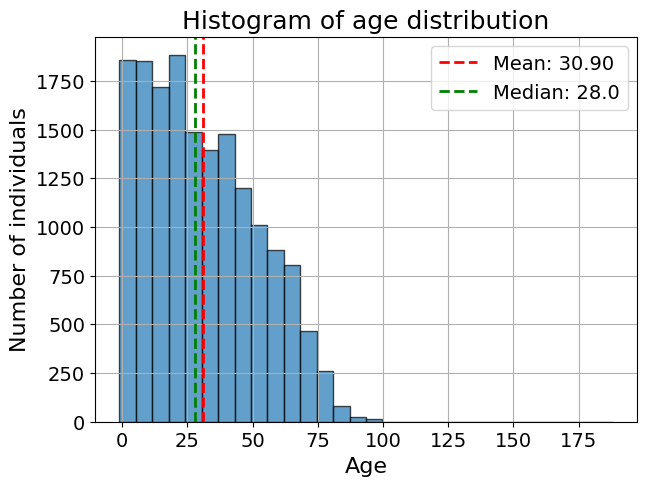

In [45]:
# Creating histogram plot
plt.figure(figsize=(7, 5))
plt.hist(ages_in_years, bins=30, alpha=0.7, edgecolor='black')
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_age}')
plt.legend(fontsize = 14)
plt.title('Histogram of age distribution', fontsize = 18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Number of individuals', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(True)
plt.show()


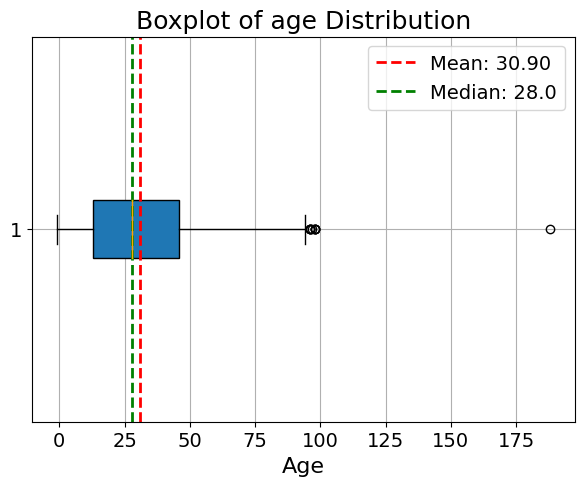

In [46]:
# Creating boxplot plot
plt.figure(figsize=(7, 5))
plt.boxplot(ages_in_years, vert=False, patch_artist=True, medianprops=dict(color='orange'), meanprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black'))
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_age}')
plt.legend(fontsize = 14)
plt.title('Boxplot of age Distribution', fontsize=18)
plt.xlabel('Age', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(True)
plt.show()

### e) Civil statut

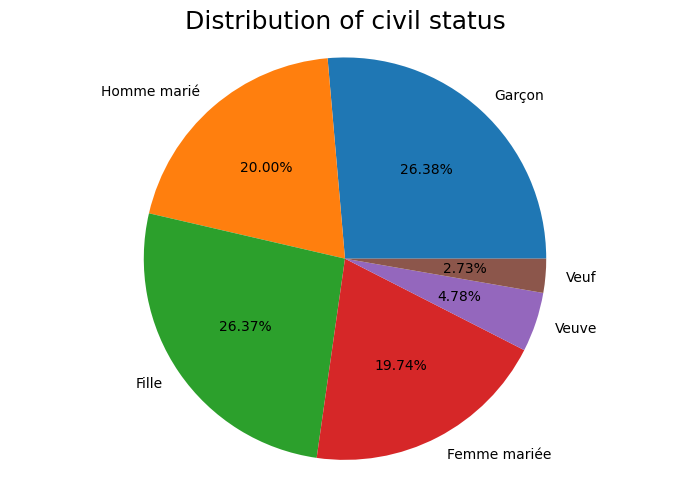

In [47]:
civil_status_counts = Counter(civil_status)
unique_statuses = list(civil_status_counts.keys())
total_individuals = len(civil_status)
relative_frequencies = [civil_status_counts[status] / total_individuals for status in unique_statuses]

plt.figure(figsize=(7, 5))
plt.pie(relative_frequencies, labels=unique_statuses, autopct=lambda p: '{:.2f}%'.format(p))
plt.title('Distribution of civil status', fontsize = 18)
plt.axis('equal')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()
plt.show()

### f)  First name

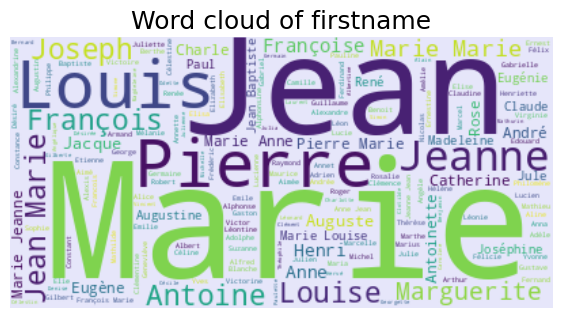

In [48]:
text = ""
for i in range(len(firstname)):
  text += " " + firstname[i]
wordcloud = WordCloud(background_color="lavender").generate(text)

plt.figure(figsize=(7, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word cloud of firstname", fontsize = 18)
plt.axis("off")
plt.show()

### g) lob

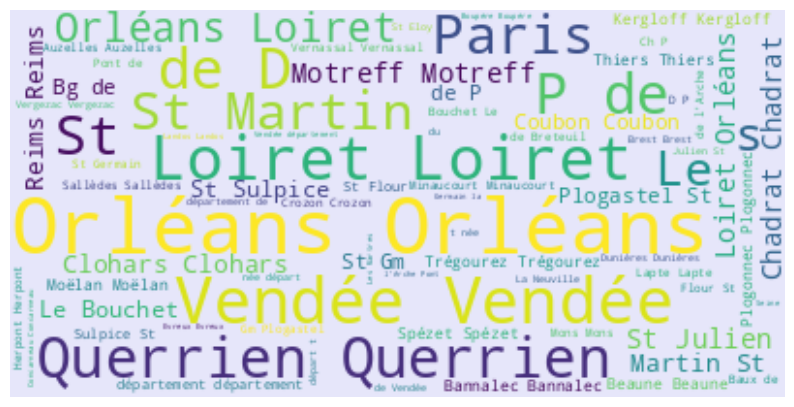

In [49]:
text = ""
for i in range(len(lob)):
  text += " " + lob[i]
excluded_terms = ["dans la", "département né", "la commune", "commune dans", "dans le", "commune"]

for term in excluded_terms:
    text = text.replace(term, "")

wordcloud = WordCloud(background_color="lavender").generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### h) Surname

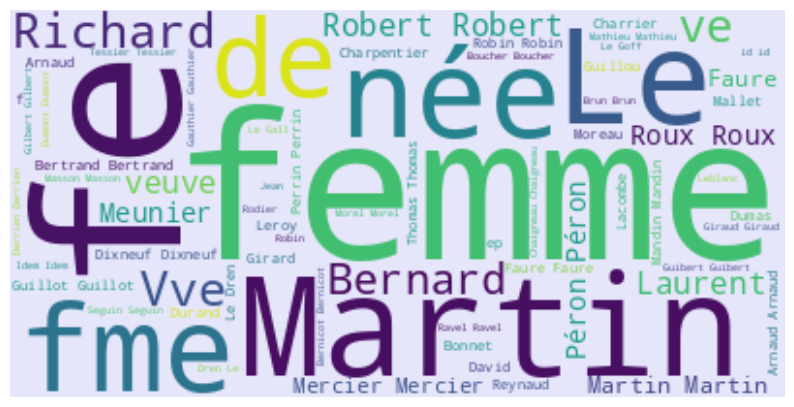

In [50]:
text = ""
for i in range(len(surname)):
  text += " " + surname[i]
wordcloud = WordCloud(background_color="lavender").generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### i) Link

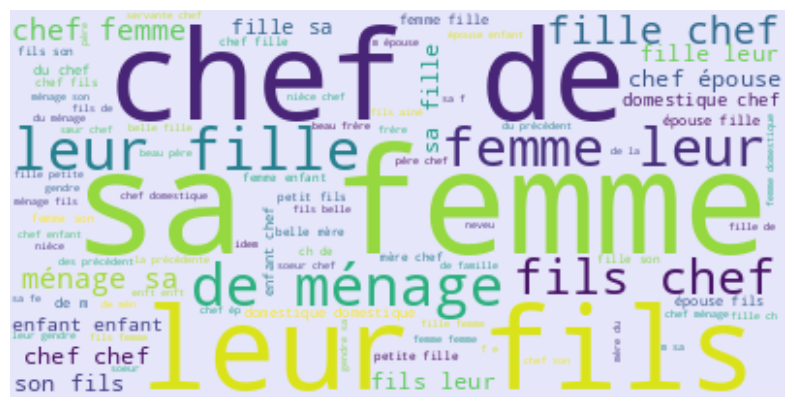

In [51]:
text = ""
for i in range(len(link)):
  text += " " + link[i]
wordcloud = WordCloud(background_color="lavender").generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()